In [4]:
import sys
sys.path.append('/home/av555/iclr/')

In [5]:
from architectures import *
from trainer import *
from loaders import *
from models import *
from utils import *

In [6]:
import numpy as np
from matplotlib import pyplot as plt
import torch

## Utils

In [7]:
def load_model(path, model):

    checkpoint = torch.load(path, map_location=torch.device('cpu'))
    model.load_state_dict(checkpoint['model_state_dict'])
    epoch = checkpoint['epoch']
    loss = checkpoint['loss']

    model.eval()
    return model, epoch, loss


In [8]:
def eval_model(model, val_loader):
    preds = []
    targets = []

    with torch.no_grad():
        for task in val_loader:
            task["dists"] = task["dists"][0,...]
            out = model(task)
            preds.append(out)
            targets.append(task["y_target"])

    #concat full arrays
    preds = torch.cat(preds, dim = 1)
    targets = torch.cat(targets, dim = 0)

    #To cpu
    preds = preds.cpu().numpy()
    targets = targets.cpu().numpy()

    return preds, targets

In [9]:
def get_val_stats_bs(predictions, targets):
        

        maes = np.zeros(predictions.shape[1])
        spearmans = np.zeros(predictions.shape[1])
        pearsons = np.zeros(predictions.shape[1])

        for st in range(predictions.shape[1]):
            # Get station
            true_mean = targets[:, st]
            pred_mean = predictions[:, st,0]
            # Remove nans
            pred_mean = pred_mean[~np.isnan(true_mean)]
            true_mean = true_mean[~np.isnan(true_mean)]

            try:
                maes[st] = np.mean(np.abs(true_mean - pred_mean))
                pearsons[st] = scipy.stats.pearsonr(pred_mean, true_mean)[0]
                spearmans[st] = scipy.stats.spearmanr(pred_mean, true_mean).correlation
            except:
                maes[st] = np.nan
                pearsons[st] = np.nan
                spearmans[st] = np.nan
                continue
        print("Mean absolute error: {}".format(np.nanmedian(maes)))
        print("Pearson correlation: {}".format(np.nanmedian(pearsons)))
        print("Spearman correlation: {}".format(np.nanmedian(spearmans)))

In [10]:
use_cpu = True
device = torch.device('cpu') if use_cpu else torch.device('cuda')


In [11]:
# data
val_ds = ValueExperimentDataset86("/home/av555/iclr/data/", device=device, train=False)
val_loader = DataLoader(
    val_ds, batch_size = 16, shuffle = False)

## convCNP

In [9]:
exp_path = "/home/av555/iclr/exps_no_distance_scaling/convCNP_value_all/"
losses = np.load(exp_path+"losses.npy")

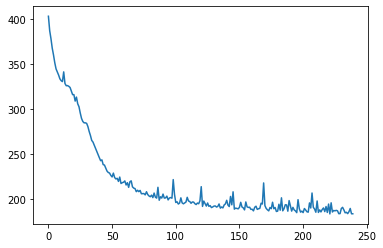

In [10]:
plt.plot(losses[10:250])

In [12]:
np.argmin(losses)


491

In [13]:
losses[491]

176.93093787299262

In [14]:
# ConvCNP

convcnp_path = "/home/av555/iclr/exps_no_distance_scaling/convCNP_value_all/epoch_491"
concnp_model = convCNP(
    in_channels=25)

concnp_model, convcnp_epoch, convcnp_loss = load_model(convcnp_path, concnp_model)
convcnp_preds, convcnp_targets = eval_model(concnp_model, val_loader)
get_val_stats_bs(convcnp_preds, convcnp_targets)

/home/av555/iclr/loaders.py:190: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:180.)
  y_context = torch.from_numpy(self.y_context[index,...]).float()


Mean absolute error: 1.4068061113357544
Pearson correlation: 0.9784008441391129
Spearman correlation: 0.9808301092550032


## convGNP-linear

In [15]:
exp_path = "/home/av555/iclr/exps_no_distance_scaling/convGNP_linear_value_all/"
losses = np.load(exp_path+"losses.npy")

In [16]:
np.argmin(losses)


488

In [17]:
losses[488]

154.25270927620696

In [18]:

convcnp_path = "/home/av555/iclr/exps_no_distance_scaling/convGNP_linear_value_all/epoch_488"
concnp_model = convGNPLinear()

concnp_model, convcnp_epoch, convcnp_loss = load_model(convcnp_path, concnp_model)
convcnp_preds, convcnp_targets = eval_model(concnp_model, val_loader)
get_val_stats_bs(convcnp_preds, convcnp_targets)

Mean absolute error: 1.3268150091171265
Pearson correlation: 0.9804741269403658
Spearman correlation: 0.9818639678864598


## convGNP-kvv

In [19]:
exp_path = "/home/av555/iclr/exps_no_distance_scaling/convGNP_kvv_value_all/"
losses = np.load(exp_path+"losses.npy")

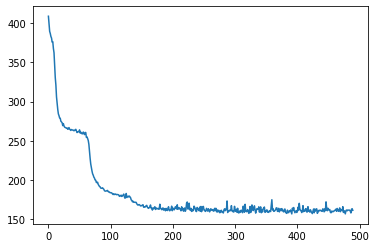

In [20]:
plt.plot(losses[10:])

In [21]:
np.argmin(losses)

401

In [23]:
losses[401]

157.02510723708323

In [24]:
# ConvCNP

convcnp_path = "/home/av555/iclr/exps_no_distance_scaling/convGNP_kvv_value_all/epoch_401"
concnp_model = convGNPKvv()

concnp_model, convcnp_epoch, convcnp_loss = load_model(convcnp_path, concnp_model)
convcnp_preds, convcnp_targets = eval_model(concnp_model, val_loader)
get_val_stats_bs(convcnp_preds, convcnp_targets)

Mean absolute error: 1.298797070980072
Pearson correlation: 0.9792437278412396
Spearman correlation: 0.9813035674252262


## convNP

In [12]:
exp_path = "/home/av555/iclr/exps_convNP/convNP_value_all/"
losses = np.load(exp_path+"losses.npy")

FileNotFoundError: [Errno 2] No such file or directory: '/home/av555/iclr/exps_convNP/convNP_value_all/losses.npy'

In [13]:
!ls /home/av555/iclr/exps_convNP/convNP_value_all

epoch_0   epoch_13  epoch_21  epoch_3	epoch_41  epoch_7
epoch_1   epoch_18  epoch_22  epoch_37	epoch_5   epoch_89
epoch_12  epoch_2   epoch_25  epoch_4	epoch_6


In [15]:
# ConvCNP

convcnp_path = "/home/av555/iclr/exps_convNP/convNP_value_all/epoch_89"
concnp_model = convNP(
    ls = 0.02,
    n_samples=24,
    n_latent_vars=32)

concnp_model, convcnp_epoch, convcnp_loss = load_model(convcnp_path, concnp_model)

In [16]:
convcnp_preds, convcnp_targets = eval_model(concnp_model, val_loader)


/home/av555/iclr/loaders.py:190: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:180.)
  y_context = torch.from_numpy(self.y_context[index,...]).float()


In [17]:
def get_val_stats_bs_convNP(predictions, targets): 

        maes = np.zeros(predictions.shape[2])
        spearmans = np.zeros(predictions.shape[2])
        pearsons = np.zeros(predictions.shape[2])

        for st in range(predictions.shape[2]):
            # Get station
            true_mean = targets[:, st]
            pred_mean = predictions[:,:, st,0]

            # Remove nans
            pred_mean = pred_mean[:,~np.isnan(true_mean)]
            true_mean = true_mean[~np.isnan(true_mean)]

            try:
                maes[st] = np.mean(np.abs(true_mean - pred_mean))
            except:
                maes[st] = np.nan
                continue
        print("Mean absolute error: {}".format(np.nanmedian(maes)))
        

In [18]:
get_val_stats_bs_convNP(convcnp_preds, convcnp_targets)

Mean absolute error: 280.46897888183594
